In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

from tabulate import tabulate
from scipy.optimize import minimize
from scipy.optimize import basinhopping


from sympy import solve, exp, log
from sympy.abc import a, b, c, d, e, f, g, h, i, w, x, y, z, q
from sympy import nonlinsolve, nsolve

In [147]:
np.random.seed(10)

In [148]:
def two_d(x):
    return x.reshape(-1, 1)

def gini(x):
    mad = np.abs(np.subtract.outer(x, x)).mean()
    rmad = mad/np.mean(x)
    g = 0.5 * rmad
    return g

#γ = Euler-Mascheroni constant 
γ = np.euler_gamma

## Equilibrium computation with SymPy

In [149]:
# Exact Equilibrium computation for 3-schools, 2-periods, assumption that school 0 is non-selective
#a, b, c = δ_0, δ_1, δ_2
#d, e = B_1, B_2
#f, g, h = K_0, K_1, K_2
#i = beta

#w, x, y, z = P_1, P_2, P_1', P_2'


def return_cutoff(a, b, c, d, e, f, g, h, i):
    mass1 = (y - d)*(z-e)
    mass2 = (w - y + d)*(z - e)
    mass3 = (y - w)*(z - e)
    mass4 = (1 - y)*(z - e)

    mass5 = (y - d)*(x - z + e)
    mass6 = (w - y + d)*(x - z + e)
    mass7 = (y - w)*(x - z + e)
    mass8 = (1 - y)*(x - z + e)

    mass9 = (y - d)*(z - x)
    mass10 = (w - y + d)*(z - x)
    mass11 = (y - w)*(z - x)
    mass12 = (1 - y)*(z - x)

    mass13 = (y - d)*(1 - z)
    mass14 = (w - y + d)*(1 - z)
    mass15 = (y - w)*(1 - z)
    mass16 = (1 - y)*(1 - z)
    
    mass1256_demand0_t1 = w*x
    mass3_4_demand0_t1 = (mass3 + mass4)*(exp(a + i*(γ + log(exp(a)+exp(b))))/ (exp(a + i*(γ + log(exp(a)+exp(b)))) + exp(b + i*(γ + log(exp(a)+exp(b))))))
    mass3_4_demand1_t1 = (mass3 + mass4)*(exp(b + i*(γ + log(exp(a)+exp(b))))/ (exp(a + i*(γ + log(exp(a)+exp(b)))) + exp(b + i*(γ + log(exp(a)+exp(b))))))

    mass7_8_demand0_t1 = (mass7 + mass8)*(exp(a + i*(γ + log(exp(a)+exp(b)+exp(c))))/ (exp(a + i*(γ + log(exp(a)+exp(b) + exp(c)))) + exp(b + i*(γ + log(exp(a)+exp(b))))))
    mass7_8_demand1_t1 = (mass7 + mass8)*(exp(b + i*(γ + log(exp(a)+exp(b))))/ (exp(a + i*(γ + log(exp(a)+exp(b) + exp(c)))) + exp(b + i*(γ + log(exp(a)+exp(b))))))

    mass9_13_demand0_t1 = (mass9 + mass13)*(exp(a + i*(γ + log(exp(a)+exp(c))))/ (exp(a + i*(γ + log(exp(a)+exp(c)))) + exp(c + i*(γ + log(exp(a)+exp(c))))))
    mass9_13_demand2_t1 = (mass9 + mass13)*(exp(c + i*(γ + log(exp(a)+exp(c))))/ (exp(a + i*(γ + log(exp(a)+exp(c)))) + exp(c + i*(γ + log(exp(a)+exp(c))))))

    mass10_14_demand0_t1 = (mass10 + mass14)*(exp(a + i*(γ + log(exp(a)+exp(b)+exp(c))))/ (exp(a + i*(γ + log(exp(a) + exp(b) + exp(c)))) + exp(c + i*(γ + log(exp(a)+exp(c))))))
    mass10_14_demand2_t1 = (mass10 + mass14)*(exp(c + i*(γ + log(exp(a)+exp(c))))/ (exp(a + i*(γ + log(exp(a) + exp(b) + exp(c)))) + exp(c + i*(γ + log(exp(a)+exp(c))))))

    mass11_demand0_t1 = mass11*(exp(a + i*(γ + log(exp(a)+exp(b)+exp(c))))/ (exp(a + i*(γ + log(exp(a) + exp(b) + exp(c)))) + exp(b + i*(γ + log(exp(a)+exp(b)))) + exp(c + i*(γ + log(exp(a)+exp(c))))))
    mass11_demand1_t1 = mass11*(exp(b + i*(γ + log(exp(a)+exp(b))))/ (exp(a + i*(γ + log(exp(a) + exp(b) + exp(c)))) + exp(b + i*(γ + log(exp(a)+exp(b)))) + exp(c + i*(γ + log(exp(a)+exp(c))))))
    mass11_demand2_t1 = mass11*(exp(c + i*(γ + log(exp(a)+exp(c))))/ (exp(a + i*(γ + log(exp(a) + exp(b) + exp(c)))) + exp(b + i*(γ + log(exp(a)+exp(b)))) + exp(c + i*(γ + log(exp(a)+exp(c))))))

    mass12_demand0_t1 = mass12*(exp(a + i*(γ + log(exp(a)+exp(b)+exp(c))))/ (exp(a + i*(γ + log(exp(a) + exp(b) + exp(c)))) + exp(b + i*(γ + log(exp(a)+exp(b)))) + exp(c + i*(γ + log(exp(a)+exp(b)+exp(c))))))
    mass12_demand1_t1 = mass12*(exp(b + i*(γ + log(exp(a)+exp(b))))/ (exp(a + i*(γ + log(exp(a) + exp(b) + exp(c)))) + exp(b + i*(γ + log(exp(a)+exp(b)))) + exp(c + i*(γ + log(exp(a)+exp(b)+exp(c))))))
    mass12_demand2_t1 = mass12*(exp(c + i*(γ + log(exp(a)+exp(b)+exp(c))))/ (exp(a + i*(γ + log(exp(a) + exp(b) + exp(c)))) + exp(b + i*(γ + log(exp(a)+exp(b)))) + exp(c + i*(γ + log(exp(a)+exp(b)+exp(c))))))

    mass15_demand0_t1 = mass15*(exp(a + i*(γ + log(exp(a)+exp(b)+exp(c))))/ (exp(a + i*(γ + log(exp(a) + exp(b) + exp(c)))) + exp(b + i*(γ + log(exp(a)+exp(b)+exp(c)))) + exp(c + i*(γ + log(exp(a)+exp(c))))))
    mass15_demand1_t1 = mass15*(exp(b + i*(γ + log(exp(a)+exp(b)+exp(c))))/ (exp(a + i*(γ + log(exp(a) + exp(b) + exp(c)))) + exp(b + i*(γ + log(exp(a)+exp(b)+exp(c)))) + exp(c + i*(γ + log(exp(a)+exp(c))))))
    mass15_demand2_t1 = mass15*(exp(c + i*(γ + log(exp(a)+exp(c))))/ (exp(a + i*(γ + log(exp(a) + exp(b) + exp(c)))) + exp(b + i*(γ + log(exp(a)+exp(b)+exp(c)))) + exp(c + i*(γ + log(exp(a)+exp(c))))))

    mass16_demand0_t1 = mass16*(exp(a + i*(γ + log(exp(a)+exp(b)+exp(c))))/ (exp(a + i*(γ + log(exp(a) + exp(b) + exp(c)))) + exp(b + i*(γ + log(exp(a)+exp(b)+exp(c)))) + exp(c + i*(γ + log(exp(a)+exp(b)+exp(c))))))
    mass16_demand1_t1 = mass16*(exp(b + i*(γ + log(exp(a)+exp(b)+exp(c))))/ (exp(a + i*(γ + log(exp(a) + exp(b) + exp(c)))) + exp(b + i*(γ + log(exp(a)+exp(b)+exp(c)))) + exp(c + i*(γ + log(exp(a)+exp(b)+exp(c))))))
    mass16_demand2_t1 = mass16*(exp(c + i*(γ + log(exp(a)+exp(b)+exp(c))))/ (exp(a + i*(γ + log(exp(a) + exp(b) + exp(c)))) + exp(b + i*(γ + log(exp(a)+exp(b)+exp(c)))) + exp(c + i*(γ + log(exp(a)+exp(b)+exp(c))))))

    
    total_demand0_t1 = mass1256_demand0_t1 + mass3_4_demand0_t1 + mass7_8_demand0_t1 + mass9_13_demand0_t1 + mass10_14_demand0_t1 + mass11_demand0_t1 + mass12_demand0_t1 + mass15_demand0_t1 + mass16_demand0_t1
    total_demand1_t1 = mass3_4_demand1_t1 + mass7_8_demand1_t1 + mass11_demand1_t1 + mass12_demand1_t1 + mass15_demand1_t1 + mass16_demand1_t1
    total_demand2_t1 = mass9_13_demand2_t1 + mass10_14_demand2_t1 + mass11_demand2_t1 + mass12_demand2_t1 + mass15_demand2_t1 + mass16_demand2_t1
    
    
    
    mass7_demand1 = mass7*(exp(b + i*(γ + log(exp(a)+exp(b))))/ (exp(a + i*(γ + log(exp(a)+exp(b) + exp(c)))) + exp(b + i*(γ + log(exp(a)+exp(b))))))
    mass8_demand1 = mass8*(exp(b + i*(γ + log(exp(a)+exp(b))))/ (exp(a + i*(γ + log(exp(a)+exp(b) + exp(c)))) + exp(b + i*(γ + log(exp(a)+exp(b))))))
    mass11_demand1 = mass11*(exp(b + i*(γ + log(exp(a)+exp(b))))/ (exp(a + i*(γ + log(exp(a) + exp(b) + exp(c)))) + exp(b + i*(γ + log(exp(a)+exp(b)))) + exp(c + i*(γ + log(exp(a)+exp(c))))))
    mass12_demand1 = mass12*(exp(b + i*(γ + log(exp(a)+exp(b))))/ (exp(a + i*(γ + log(exp(a) + exp(b) + exp(c)))) + exp(b + i*(γ + log(exp(a)+exp(b)))) + exp(c + i*(γ + log(exp(a)+exp(b)+exp(c))))))
    mass10_demand2 = mass10*(exp(c + i*(γ + log(exp(a)+exp(c))))/ (exp(a + i*(γ + log(exp(a) + exp(b) + exp(c)))) + exp(c + i*(γ + log(exp(a)+exp(c))))))
    mass11_demand2 = mass11*(exp(c + i*(γ + log(exp(a)+exp(c))))/ (exp(a + i*(γ + log(exp(a) + exp(b) + exp(c)))) + exp(b + i*(γ + log(exp(a)+exp(b)))) + exp(c + i*(γ + log(exp(a)+exp(c))))))
    mass14_demand2 = mass14*(exp(c + i*(γ + log(exp(a)+exp(c))))/ (exp(a + i*(γ + log(exp(a) + exp(b) + exp(c)))) + exp(c + i*(γ + log(exp(a)+exp(c))))))
    mass15_demand2 = mass15*(exp(c + i*(γ + log(exp(a)+exp(c))))/ (exp(a + i*(γ + log(exp(a) + exp(b) + exp(c)))) + exp(b + i*(γ + log(exp(a)+exp(b)+exp(c)))) + exp(c + i*(γ + log(exp(a)+exp(c))))))

    mass7_demand0 = mass7*(exp(a + i*(γ + log(exp(a)+exp(b)+exp(c))))/ (exp(a + i*(γ + log(exp(a)+exp(b) + exp(c)))) + exp(b + i*(γ + log(exp(a)+exp(b))))))
    mass8_demand0 = mass8*(exp(a + i*(γ + log(exp(a)+exp(b)+exp(c))))/ (exp(a + i*(γ + log(exp(a)+exp(b) + exp(c)))) + exp(b + i*(γ + log(exp(a)+exp(b))))))
    mass10_demand0 = mass10*(exp(a + i*(γ + log(exp(a)+exp(b)+exp(c))))/ (exp(a + i*(γ + log(exp(a) + exp(b) + exp(c)))) + exp(c + i*(γ + log(exp(a)+exp(c))))))
    mass11_demand0 = mass11*(exp(a + i*(γ + log(exp(a)+exp(b)+exp(c))))/ (exp(a + i*(γ + log(exp(a) + exp(b) + exp(c)))) + exp(b + i*(γ + log(exp(a)+exp(b)))) + exp(c + i*(γ + log(exp(a)+exp(c))))))
    mass12_demand0 = mass12*(exp(a + i*(γ + log(exp(a)+exp(b)+exp(c))))/ (exp(a + i*(γ + log(exp(a) + exp(b) + exp(c)))) + exp(b + i*(γ + log(exp(a)+exp(b)))) + exp(c + i*(γ + log(exp(a)+exp(b)+exp(c))))))
    mass12_demand2 = mass12*(exp(c + i*(γ + log(exp(a)+exp(b)+exp(c))))/ (exp(a + i*(γ + log(exp(a) + exp(b) + exp(c)))) + exp(b + i*(γ + log(exp(a)+exp(b)))) + exp(c + i*(γ + log(exp(a)+exp(b)+exp(c))))))
    mass14_demand0 = mass14*(exp(a + i*(γ + log(exp(a)+exp(b)+exp(c))))/ (exp(a + i*(γ + log(exp(a) + exp(b) + exp(c)))) + exp(c + i*(γ + log(exp(a)+exp(c))))))
    mass15_demand0 = mass15*(exp(a + i*(γ + log(exp(a)+exp(b)+exp(c))))/ (exp(a + i*(γ + log(exp(a) + exp(b) + exp(c)))) + exp(b + i*(γ + log(exp(a)+exp(b)+exp(c)))) + exp(c + i*(γ + log(exp(a)+exp(c))))))
    mass15_demand1 = mass15*(exp(b + i*(γ + log(exp(a)+exp(b)+exp(c))))/ (exp(a + i*(γ + log(exp(a) + exp(b) + exp(c)))) + exp(b + i*(γ + log(exp(a)+exp(b)+exp(c)))) + exp(c + i*(γ + log(exp(a)+exp(c))))))

    total_demand0_t2 = mass1 + (mass2 + mass3 + mass4 + mass7_demand1 + mass8_demand1 + mass11_demand1 + mass12_demand1)*((exp(a))/((exp(a)+exp(b)))) + (mass5 + mass9 + mass13 + mass10_demand2 + mass11_demand2 + mass14_demand2 + mass15_demand2)*((exp(a))/((exp(a)+exp(c)))) + (mass6 + mass7_demand0 + mass8_demand0 + mass10_demand0 + mass11_demand0 + mass12_demand0 + mass12_demand2 + mass14_demand0 + mass15_demand0 + mass15_demand1 + mass16)*((exp(a))/((exp(a)+exp(b)+exp(c))))
    total_demand1_t2 = (mass2 + mass3 + mass4 + mass7_demand1 + mass8_demand1 + mass11_demand1 + mass12_demand1)*((exp(b))/((exp(a)+exp(b)))) + (mass6 + mass7_demand0 + mass8_demand0 + mass10_demand0 + mass11_demand0 + mass12_demand0 + mass12_demand2 + mass14_demand0 + mass15_demand0 + mass15_demand1 + mass16)*((exp(b))/((exp(a)+exp(b)+exp(c))))
    total_demand2_t2 = (mass5 + mass9 + mass13 + mass10_demand2 + mass11_demand2 + mass14_demand2 + mass15_demand2)*((exp(c))/((exp(a)+exp(c)))) + (mass6 + mass7_demand0 + mass8_demand0 + mass10_demand0 + mass11_demand0 + mass12_demand0 + mass12_demand2 + mass14_demand0 + mass15_demand0 + mass15_demand1 + mass16)*((exp(c))/((exp(a)+exp(b)+exp(c))))
    
    
    #Market clearing equations:
    eq1 = total_demand0_t1 - f
    eq2 = total_demand1_t1 - g
    eq3 = total_demand2_t1 - h
    
    eq4 = total_demand0_t2 - f
    eq5 = total_demand1_t2 - g
    eq6 = total_demand2_t2 - h

    eq_cutoff = np.array(nsolve((eq1, eq2, eq3, eq4, eq5, eq6), (w, x, y, z), (1/2, 1/2, 1/2, 1/2)))
    
    return eq_cutoff

In [150]:
#Examples: P_1, P_2, P_1', P_2' 

return_cutoff(0, 1, 2, 0, 0, 1/3, 1/3, 1/3, 0.9)

array([[0.349134521218636],
       [0.549853118445276],
       [0.349134521218636],
       [0.549853118445276]], dtype=object)

In [151]:
return_cutoff(0, 1, 2, 0.2, 0.2, 1/3, 1/3, 1/3, 0.9) #cutoffs are affected at period 1: the bonus has an effect

array([[0.324893222462167],
       [0.560853968903550],
       [0.538690024675773],
       [0.748145201340381]], dtype=object)

In [152]:
#inegalitarian schools: bonus close to neutral

return_cutoff(0, 5, 20, 0, 0, 1/3, 1/3, 1/3, 0.9)

array([[0.496631064736505],
       [0.666666614652382],
       [0.496631064736505],
       [0.666666614652381]], dtype=object)

In [153]:
return_cutoff(0, 5, 20, 0.2, 0.2, 1/3, 1/3, 1/3, 0.9) #note that the bonus does not modify much the cutoffs at period 1

array([[0.496631033629754],
       [0.666666645448674],
       [0.696631049339164],
       [0.866666635044749]], dtype=object)

In [154]:
#Discrete approximation: bases itself on the exact equilibrium computed through return_cutoff to generate
#data corresponding to what we could observe in a dataset

def discrete_matching(I, B1, B2, δ_vec, β, K_0, K_1, K_2):
    z1_init, z2_init = np.random.uniform(0, 1, size=I), np.random.uniform(0, 1, size=I)
    eq_cutoff = return_cutoff(δ_vec[0], δ_vec[1], δ_vec[2], B1, B2, K_0, K_1, K_2, β)
    P_1, P_2, P_1_prim, P_2_prim = eq_cutoff[0], eq_cutoff[1], eq_cutoff[2], eq_cutoff[3]
    
    teacher_matching = np.empty((I, 6))
    teacher_matching[:, 0:2]=np.concatenate((two_d(z1_init), two_d(z2_init)), axis=1)
    teacher_matching[:, 2:5] = np.random.gumbel(0, 1, size=(I, 3))
    teacher_matching[:, 5] = np.zeros(I)


    demand_vec = np.empty((I, 1))
    
    for i in range(I):
        z_i1 = teacher_matching[i, 0]
        z_i2 = teacher_matching[i, 1]

        i_choice_set_t1 = [0]
        if z_i1 > P_1:
            i_choice_set_t1.append(1)
        if z_i2 > P_2:
            i_choice_set_t1.append(2)


        utility_vector = -1000*np.ones(3)

        for j in i_choice_set_t1:
            i_choice_set_t2_if_j_t1 = list(set([0, j]))
            if j==0:
                z_i1_prim = z_i1+B1
                z_i2_prim = z_i2+B2
            else:
                z_i1_prim = z_i1
                z_i2_prim = z_i2

            if z_i1_prim > P_1_prim:
                i_choice_set_t2_if_j_t1.append(1)
            if z_i2_prim > P_2_prim:
                i_choice_set_t2_if_j_t1.append(2)

            i_choice_t2 = np.array(list(set(i_choice_set_t2_if_j_t1)))
            utility_vector[j] = δ_vec[j]+β*(γ + np.log(np.sum(np.exp(i_choice_t2)))) + teacher_matching[i, 2+j]

        demand_vec[i] = np.argmax(utility_vector)


    teacher_matching[:, -1] = demand_vec.reshape(-1)
    
    school_scores = []

    for j in range(δ_vec.shape[0]):
        scores_j = teacher_matching[np.argwhere(teacher_matching[:, -1]==j), :].reshape(teacher_matching[np.argwhere(teacher_matching[:, -1]==j), :].shape[0], teacher_matching[np.argwhere(teacher_matching[:, -1]==j), :].shape[2])[:, :2]
        mean_score = (scores_j[:, 0] + scores_j[:, 1])/2
        school_scores.append(np.mean(mean_score))
        
    return school_scores, gini(school_scores), teacher_matching

## Generation of Figure 3

Text(0.72, 0.8, '0: {0, 1, 2}\n1: {0, 1, 2}\n2: {0, 1, 2}')

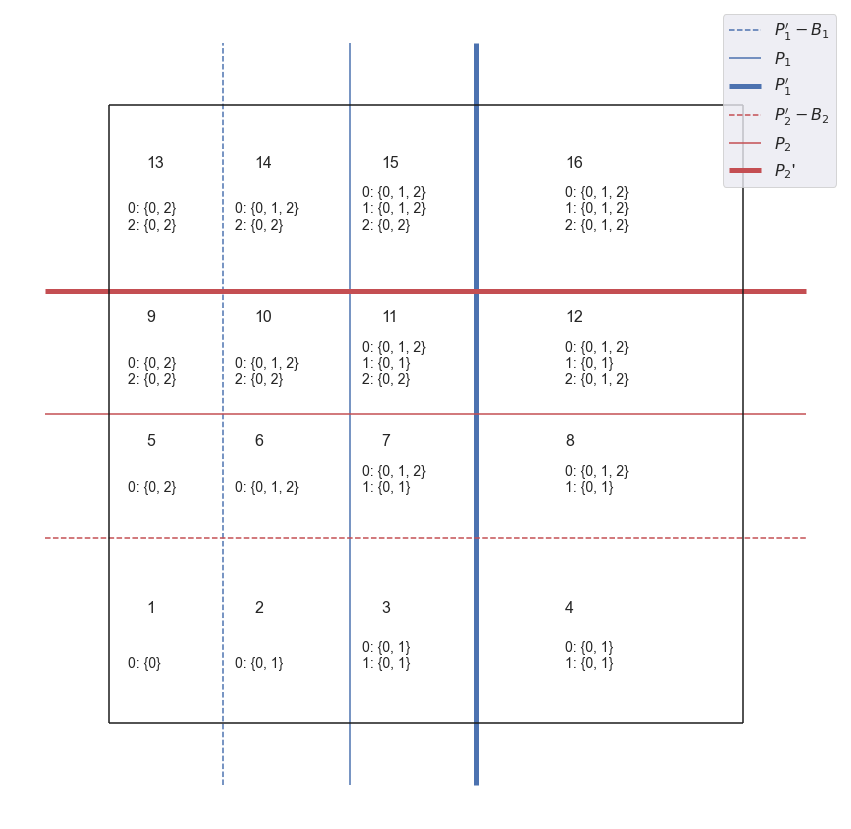

In [155]:
P_1 = 0.38
P_1prim = 0.58
B_1 = 0.4
P_2 = 0.5
P_2prim = 0.7
B_2 = 0.4


plt.rcParams['figure.figsize']=(15, 15)
fig, ax = plt.subplots()

ax.vlines(x=(P_1prim - B_1), ymin=-0.1, ymax=1.1, label="$P_1' - B_1$", linestyles="--", colors='b')
ax.vlines(x=(P_1), ymin=-0.1, ymax=1.1, label="$P_1$", colors='b')
ax.vlines(x=(P_1prim), ymin=-0.1, ymax=1.1, label="$P_1'$", colors='b', lw=5)

ax.hlines(y = (P_2prim - B_2), xmin=-0.1, xmax = 1.1, label="$P_2' - B_2$", linestyle="--", colors='r')
ax.hlines(y = (P_2), xmin=-0.1, xmax = 1.1, label="$P_2$", colors='r')
ax.hlines(y = (P_2prim), xmin=-0.1, xmax = 1.1, label="$P_2$'",colors='r', lw=5)

ax.vlines(x=0, ymin=0, ymax=1)
ax.vlines(x=1, ymin=0, ymax=1)
ax.hlines(y=0, xmin=0, xmax=1)
ax.hlines(y=1, xmin=0, xmax=1)


ax.legend(loc=1, prop={'size': 16})
ax.text(0.06, 0.18, "1", fontsize=16)
ax.text(0.23, 0.18, "2", fontsize=16)
ax.text(0.43, 0.18, "3", fontsize=16)
ax.text(0.72, 0.18, "4", fontsize=16)

ax.text(0.06, 0.45, "5", fontsize=16)
ax.text(0.23, 0.45, "6", fontsize=16)
ax.text(0.43, 0.45, "7", fontsize=16)
ax.text(0.72, 0.45, "8", fontsize=16)

ax.text(0.06, 0.65, "9", fontsize=16)
ax.text(0.23, 0.65, "10", fontsize=16)
ax.text(0.43, 0.65, "11", fontsize=16)
ax.text(0.72, 0.65, "12", fontsize=16)

ax.text(0.06, 0.9, "13", fontsize=16)
ax.text(0.23, 0.9, "14", fontsize=16)
ax.text(0.43, 0.9, "15", fontsize=16)
ax.text(0.72, 0.9, "16", fontsize=16)

plt.axis('off')


ax.text(0.03, 0.09, "0: {0}", fontsize=14)
ax.text(0.2, 0.09, "0: {0, 1}", fontsize=14)
ax.text(0.4, 0.09, "0: {0, 1}\n1: {0, 1}", fontsize=14)
ax.text(0.72, 0.09, "0: {0, 1}\n1: {0, 1}", fontsize=14)

ax.text(0.03, 0.375, "0: {0, 2}", fontsize=14)
ax.text(0.2, 0.375, "0: {0, 1, 2}", fontsize=14)
ax.text(0.4, 0.375, "0: {0, 1, 2}\n1: {0, 1}", fontsize=14)
ax.text(0.72, 0.375, "0: {0, 1, 2}\n1: {0, 1}", fontsize=14)

ax.text(0.03, 0.55, "0: {0, 2}\n2: {0, 2}", fontsize=14)
ax.text(0.2, 0.55, "0: {0, 1, 2}\n2: {0, 2}", fontsize=14)
ax.text(0.4, 0.55, "0: {0, 1, 2}\n1: {0, 1}\n2: {0, 2}", fontsize=14)
ax.text(0.72, 0.55, "0: {0, 1, 2}\n1: {0, 1}\n2: {0, 1, 2}", fontsize=14)

ax.text(0.03, 0.8, "0: {0, 2}\n2: {0, 2}", fontsize=14)
ax.text(0.2, 0.8, "0: {0, 1, 2}\n2: {0, 2}", fontsize=14)
ax.text(0.4, 0.8, "0: {0, 1, 2}\n1: {0, 1, 2}\n2: {0, 2}", fontsize=14)
ax.text(0.72, 0.8, "0: {0, 1, 2}\n1: {0, 1, 2}\n2: {0, 1, 2}", fontsize=14)

## Counterfactuals

In [156]:
len_exp=100
δ_vec_v = np.array([0, 1, 2])


atq_rep_bonus_0_0 = []
atq_rep_bonus_04_04 = []
atq_rep_bonus_0_06 = []
atq_rep_bonus_06_0 = []


for i in range(len_exp):
    exp_i_0_0 = discrete_matching(I=300, B1 = 0, B2 = 0, δ_vec = δ_vec_v, β = 0.9, K_0 = 1/3, K_1 = 1/3, K_2 = 1/3)[0][0]
    atq_rep_bonus_0_0.append(exp_i_0_0)
    
    exp_i_04_04 = discrete_matching(I=300, B1 = 0.4, B2 = 0.4, δ_vec = δ_vec_v, β = 0.9, K_0 = 1/3, K_1 = 1/3, K_2 = 1/3)[0][0]
    atq_rep_bonus_04_04.append(exp_i_04_04)
    
    exp_i_0_06 = discrete_matching(I=300, B1 = 0, B2 = 0.6, δ_vec = δ_vec_v, β = 0.9, K_0 = 1/3, K_1 = 1/3, K_2 = 1/3)[0][0]
    atq_rep_bonus_0_06.append(exp_i_0_06)
    
    exp_i_06_0 = discrete_matching(I=300, B1 = 0.6, B2 = 0, δ_vec =δ_vec_v, β = 0.9, K_0 = 1/3, K_1 = 1/3, K_2 = 1/3)[0][0]
    atq_rep_bonus_06_0.append(exp_i_06_0)

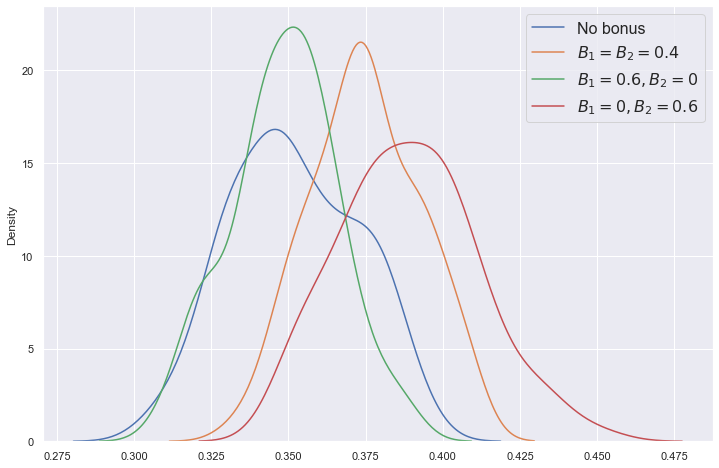

In [157]:
plt.rcParams['figure.figsize']=(12, 8)
sns.set(font_scale = 1)
bw_parameter = 1
sns.kdeplot(atq_rep_bonus_0_0, label="No bonus", bw_adjust = bw_parameter)
sns.kdeplot(atq_rep_bonus_04_04, label="$B_1 = B_2 = 0.4$", bw_adjust = bw_parameter)
sns.kdeplot(atq_rep_bonus_06_0, label="$B_1 = 0.6, B_2 = 0$", bw_adjust = bw_parameter)
sns.kdeplot(atq_rep_bonus_0_06, label="$B_1 = 0, B_2 = 0.6$", bw_adjust = bw_parameter)
plt.legend(loc=1, prop={'size': 16})

In [158]:
δ_vec_v_2 = np.array([0, 5, 20])


atq_rep_bonus_0_0_2 = []
atq_rep_bonus_04_04_2 = []
atq_rep_bonus_0_06_2 = []
atq_rep_bonus_06_0_2 = []


for i in range(len_exp):
    exp_i_0_0_2 = discrete_matching(I=300, B1 = 0, B2 = 0, δ_vec = δ_vec_v_2, β = 0.9, K_0 = 1/3, K_1 = 1/3, K_2 = 1/3)[0][0]
    atq_rep_bonus_0_0_2.append(exp_i_0_0_2)
    
    exp_i_04_04_2 = discrete_matching(I=300, B1 = 0.4, B2 = 0.4, δ_vec = δ_vec_v_2, β = 0.9, K_0 = 1/3, K_1 = 1/3, K_2 = 1/3)[0][0]
    atq_rep_bonus_04_04_2.append(exp_i_04_04_2)
    
    exp_i_0_06_2 = discrete_matching(I=300, B1 = 0, B2 = 0.6, δ_vec = δ_vec_v_2, β = 0.9, K_0 = 1/3, K_1 = 1/3, K_2 = 1/3)[0][0]
    atq_rep_bonus_0_06_2.append(exp_i_0_06_2)
    
    exp_i_06_0_2 = discrete_matching(I=300, B1 = 0.6, B2 = 0, δ_vec =δ_vec_v_2, β = 0.9, K_0 = 1/3, K_1 = 1/3, K_2 = 1/3)[0][0]
    atq_rep_bonus_06_0_2.append(exp_i_06_0_2)

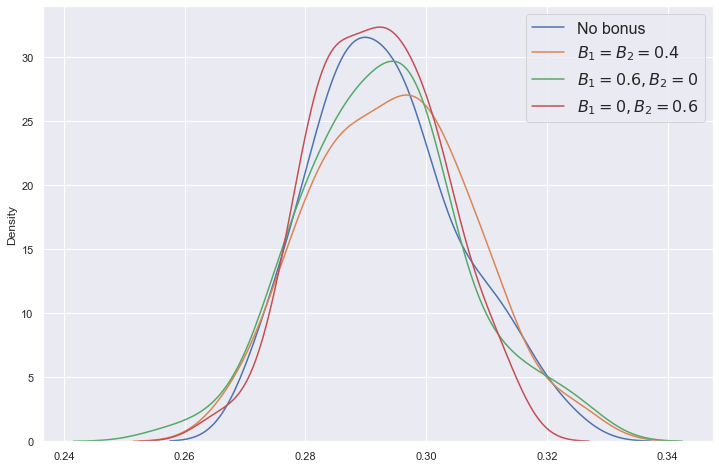

In [159]:
sns.set(font_scale = 1)
bw_parameter = 1
sns.kdeplot(atq_rep_bonus_0_0_2, label="No bonus", bw_adjust = bw_parameter)
sns.kdeplot(atq_rep_bonus_04_04_2, label="$B_1 = B_2 = 0.4$", bw_adjust = bw_parameter)
sns.kdeplot(atq_rep_bonus_06_0_2, label="$B_1 = 0.6, B_2 = 0$", bw_adjust = bw_parameter)
sns.kdeplot(atq_rep_bonus_0_06_2, label="$B_1 = 0, B_2 = 0.6$", bw_adjust = bw_parameter)
plt.legend(loc=1, prop={'size': 16})

### Systematic comparison of scenarios

In [160]:
#Simulations for determining the effect of bonuses
#13 different bonus scenarios, we suppose egalitarian schools


len_exp=80
δ_vec_v = np.array([0, 1, 2])
school_scores = np.empty((len_exp, 13, δ_vec_v.shape[0]))
gini_scores = np.empty((len_exp, 13))


for i in range(len_exp):
    sim_0_0 = discrete_matching(I=300, B1 = 0, B2 = 0, δ_vec = δ_vec_v, β = 0.9, K_0 = 1/3, K_1 = 1/3, K_2 = 1/3)
    school_scores[i, 0, :] = sim_0_0[0]
    gini_scores[i, 0] = sim_0_0[1]
    
    sim_2_2 = discrete_matching(I=300, B1 = 0.2, B2 = 0.2, δ_vec = δ_vec_v, β = 0.9, K_0 = 1/3, K_1 = 1/3, K_2 = 1/3)
    school_scores[i, 1, :] = sim_2_2[0]
    gini_scores[i, 1] = sim_2_2[1]
    
    sim_4_4 = discrete_matching(I=300, B1 = 0.4, B2 = 0.4, δ_vec = δ_vec_v, β = 0.9, K_0 = 1/3, K_1 = 1/3, K_2 = 1/3)
    school_scores[i, 2, :] = sim_4_4[0]
    gini_scores[i, 2] = sim_4_4[1]
    
    sim_6_6 = discrete_matching(I=300, B1 = 0.6, B2 = 0.6, δ_vec = δ_vec_v, β = 0.9, K_0 = 1/3, K_1 = 1/3, K_2 = 1/3)
    school_scores[i, 3, :] = sim_6_6[0]
    gini_scores[i, 3] = sim_6_6[1]   
    
    sim_8_8 = discrete_matching(I=300, B1 = 0.8, B2 = 0.8, δ_vec = δ_vec_v, β = 0.9, K_0 = 1/3, K_1 = 1/3, K_2 = 1/3)
    school_scores[i, 4, :] = sim_8_8[0]
    gini_scores[i, 4] = sim_8_8[1]
    
    
    
    
    
    sim_2_0 = discrete_matching(I=300, B1 = 0.2, B2 = 0, δ_vec = δ_vec_v, β = 0.9, K_0 = 1/3, K_1 = 1/3, K_2 = 1/3)
    school_scores[i, 5, :] = sim_2_0[0]
    gini_scores[i, 5] = sim_2_0[1]
    
    sim_4_0 = discrete_matching(I=300, B1 = 0.4, B2 = 0, δ_vec = δ_vec_v, β = 0.9, K_0 = 1/3, K_1 = 1/3, K_2 = 1/3)
    school_scores[i, 6, :] = sim_4_0[0]
    gini_scores[i, 6] = sim_4_0[1]
    
    sim_6_0 = discrete_matching(I=300, B1 = 0.6, B2 = 0, δ_vec = δ_vec_v, β = 0.9, K_0 = 1/3, K_1 = 1/3, K_2 = 1/3)
    school_scores[i, 7, :] = sim_6_0[0]
    gini_scores[i, 7] = sim_6_0[1]
    
    sim_8_0 = discrete_matching(I=300, B1 = 0.8, B2 = 0, δ_vec = δ_vec_v, β = 0.9, K_0 = 1/3, K_1 = 1/3, K_2 = 1/3)
    school_scores[i, 8, :] = sim_8_0[0]
    gini_scores[i, 8] = sim_8_0[1]
    
    
    
    
    
    sim_0_2 = discrete_matching(I=300, B1 = 0, B2 = 0.2, δ_vec = δ_vec_v, β = 0.9, K_0 = 1/3, K_1 = 1/3, K_2 = 1/3)
    school_scores[i, 9, :] = sim_0_2[0]
    gini_scores[i, 9] = sim_0_2[1]
    
    sim_0_4 = discrete_matching(I=300, B1 = 0, B2 = 0.4, δ_vec = δ_vec_v, β = 0.9, K_0 = 1/3, K_1 = 1/3, K_2 = 1/3)
    school_scores[i, 10, :] = sim_0_4[0]
    gini_scores[i, 10] = sim_0_4[1]
    
    sim_0_6 = discrete_matching(I=300, B1 = 0, B2 = 0.6, δ_vec = δ_vec_v, β = 0.9, K_0 = 1/3, K_1 = 1/3, K_2 = 1/3)
    school_scores[i, 11, :] = sim_0_6[0]
    gini_scores[i, 11] = sim_0_6[1]
    
    sim_0_8 = discrete_matching(I=300, B1 = 0, B2 = 0.8, δ_vec = δ_vec_v, β = 0.9, K_0 = 1/3, K_1 = 1/3, K_2 = 1/3)
    school_scores[i, 12, :] = sim_0_8[0]
    gini_scores[i, 12] = sim_0_8[1]
    
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79


In [161]:
#Simulations for determining the effect of bonuses

len_exp=80
δ_vec_v_2 = np.array([0, 5, 20])
school_scores_2 = np.empty((len_exp, 13, δ_vec_v_2.shape[0]))
gini_scores_2 = np.empty((len_exp, 13))


for i in range(len_exp):
    sim_0_0 = discrete_matching(I=300, B1 = 0, B2 = 0, δ_vec = δ_vec_v_2, β = 0.9, K_0 = 1/3, K_1 = 1/3, K_2 = 1/3)
    school_scores_2[i, 0, :] = sim_0_0[0]
    gini_scores_2[i, 0] = sim_0_0[1]
    
    sim_2_2 = discrete_matching(I=300, B1 = 0.2, B2 = 0.2, δ_vec = δ_vec_v_2, β = 0.9, K_0 = 1/3, K_1 = 1/3, K_2 = 1/3)
    school_scores_2[i, 1, :] = sim_2_2[0]
    gini_scores_2[i, 1] = sim_2_2[1]
    
    sim_4_4 = discrete_matching(I=300, B1 = 0.4, B2 = 0.4, δ_vec = δ_vec_v_2, β = 0.9, K_0 = 1/3, K_1 = 1/3, K_2 = 1/3)
    school_scores_2[i, 2, :] = sim_4_4[0]
    gini_scores_2[i, 2] = sim_4_4[1]
    
    sim_6_6 = discrete_matching(I=300, B1 = 0.6, B2 = 0.6, δ_vec = δ_vec_v_2, β = 0.9, K_0 = 1/3, K_1 = 1/3, K_2 = 1/3)
    school_scores_2[i, 3, :] = sim_6_6[0]
    gini_scores_2[i, 3] = sim_6_6[1]   
    
    sim_8_8 = discrete_matching(I=300, B1 = 0.8, B2 = 0.8, δ_vec = δ_vec_v_2, β = 0.9, K_0 = 1/3, K_1 = 1/3, K_2 = 1/3)
    school_scores_2[i, 4, :] = sim_8_8[0]
    gini_scores_2[i, 4] = sim_8_8[1]
    
    
    
    
    
    sim_2_0 = discrete_matching(I=300, B1 = 0.2, B2 = 0, δ_vec = δ_vec_v_2, β = 0.9, K_0 = 1/3, K_1 = 1/3, K_2 = 1/3)
    school_scores_2[i, 5, :] = sim_2_0[0]
    gini_scores_2[i, 5] = sim_2_0[1]
    
    sim_4_0 = discrete_matching(I=300, B1 = 0.4, B2 = 0, δ_vec = δ_vec_v_2, β = 0.9, K_0 = 1/3, K_1 = 1/3, K_2 = 1/3)
    school_scores_2[i, 6, :] = sim_4_0[0]
    gini_scores_2[i, 6] = sim_4_0[1]
    
    sim_6_0 = discrete_matching(I=300, B1 = 0.6, B2 = 0, δ_vec = δ_vec_v_2, β = 0.9, K_0 = 1/3, K_1 = 1/3, K_2 = 1/3)
    school_scores_2[i, 7, :] = sim_6_0[0]
    gini_scores_2[i, 7] = sim_6_0[1]
    
    sim_8_0 = discrete_matching(I=300, B1 = 0.8, B2 = 0, δ_vec = δ_vec_v_2, β = 0.9, K_0 = 1/3, K_1 = 1/3, K_2 = 1/3)
    school_scores_2[i, 8, :] = sim_8_0[0]
    gini_scores_2[i, 8] = sim_8_0[1]
    
    
    
    
    
    sim_0_2 = discrete_matching(I=300, B1 = 0, B2 = 0.2, δ_vec = δ_vec_v_2, β = 0.9, K_0 = 1/3, K_1 = 1/3, K_2 = 1/3)
    school_scores_2[i, 9, :] = sim_0_2[0]
    gini_scores_2[i, 9] = sim_0_2[1]
    
    sim_0_4 = discrete_matching(I=300, B1 = 0, B2 = 0.4, δ_vec = δ_vec_v_2, β = 0.9, K_0 = 1/3, K_1 = 1/3, K_2 = 1/3)
    school_scores_2[i, 10, :] = sim_0_4[0]
    gini_scores_2[i, 10] = sim_0_4[1]
    
    sim_0_6 = discrete_matching(I=300, B1 = 0, B2 = 0.6, δ_vec = δ_vec_v_2, β = 0.9, K_0 = 1/3, K_1 = 1/3, K_2 = 1/3)
    school_scores_2[i, 11, :] = sim_0_6[0]
    gini_scores_2[i, 11] = sim_0_6[1]
    
    sim_0_8 = discrete_matching(I=300, B1 = 0, B2 = 0.8, δ_vec = δ_vec_v_2, β = 0.9, K_0 = 1/3, K_1 = 1/3, K_2 = 1/3)
    school_scores_2[i, 12, :] = sim_0_8[0]
    gini_scores_2[i, 12] = sim_0_8[1]
    
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79


In [162]:
#0, 1, 2
B_array = np.array([[0.0, 0.0],
              [0.2, 0.2],
              [0.4, 0.4],
              [0.6, 0.6],
              [0.8, 0.8],
              [0.2, 0.0],
              [0.4, 0.0],
              [0.6, 0.0],
              [0.8, 0.0],
              [0.0, 0.2],
              [0.0, 0.4],
              [0.0, 0.6],
              [0.0, 0.8]])

cutoff_values = np.empty((13, 2))

for i_b, B in enumerate(B_array):
    cutoff_values[i_b, :] = return_cutoff(0, 1, 2, B[0], B[1], 1/3, 1/3, 1/3, 0.9)[0:2].reshape(-1)

    
#0, 5, 20
cutoff_values2 = np.empty((13, 2))

for i_b, B in enumerate(B_array):
    cutoff_values2[i_b, :] = return_cutoff(0, 5, 20, B[0], B[1], 1/3, 1/3, 1/3, 0.9)[0:2].reshape(-1)

    


In [163]:
experiment_report_0_1_2_df = pd.DataFrame(np.concatenate((two_d(np.round(np.mean(gini_scores, axis=0), 3)), np.round(np.mean(school_scores, axis=0), 3), np.round(cutoff_values, 3)), axis=1))
experiment_report_0_1_2_df.columns=["GINI", "$ATQ_0$", "$ATQ_1$", "$ATQ_2$", "$P_1$", "$P_2$"]
experiment_report_0_1_2_df.index = ["No Bonus", "$B_1 = B_2 = 0.2$", "$B_1 = B_2 = 0.4$", "$B_1 = B_2 = 0.6$", "$B_1 = B_2 = 0.8$", "$B_1 = 0.2, B_2 =0$", "$B_1 = 0.4, B_2 = 0$", "$B_1 = 0.6, B_2 = 0$", "$B_1 = 0.8, B_2 = 0$", "$B_1 = 0, B_2 = 0.2$", "$B_1 = 0, B_2 = 0.4$", "$B_1 = 0, B_2 = 0.6$", "$B_1 = 0, B_2 = 0.8$"]

In [164]:
experiment_report_0_5_20_df = pd.DataFrame(np.concatenate((two_d(np.round(np.mean(gini_scores_2, axis=0), 3)), np.round(np.mean(school_scores_2, axis=0), 3), np.round(cutoff_values2, 3)), axis=1))
experiment_report_0_5_20_df.columns=["GINI", "$ATQ_0$", "$ATQ_1$", "$ATQ_2$", "$P_1$", "$P_2$"]
experiment_report_0_5_20_df.index = ["No Bonus", "$B_1 = B_2 = 0.2$", "$B_1 = B_2 = 0.4$", "$B_1 = B_2 = 0.6$", "$B_1 = B_2 = 0.8$", "$B_1 = 0.2, B_2 =0$", "$B_1 = 0.4, B_2 = 0$", "$B_1 = 0.6, B_2 = 0$", "$B_1 = 0.8, B_2 = 0$", "$B_1 = 0, B_2 = 0.2$", "$B_1 = 0, B_2 = 0.4$", "$B_1 = 0, B_2 = 0.6$", "$B_1 = 0, B_2 = 0.8$"]

In [170]:
experiment_report_0_1_2_df

,GINI,$ATQ_0$,$ATQ_1$,$ATQ_2$,$P_1$,$P_2$
No Bonus,0.118,0.354,0.529,0.619,0.349,0.550
$B_1 = B_2 = 0.2$,0.119,0.358,0.516,0.627,0.325,0.561
$B_1 = B_2 = 0.4$,0.121,0.365,0.497,0.636,0.296,0.574
$B_1 = B_2 = 0.6$,0.093,0.410,0.457,0.615,-0.101,0.452
$B_1 = B_2 = 0.8$,0.092,0.413,0.456,0.617,-0.155,0.464
"$B_1 = 0.2, B_2 =0$",0.122,0.347,0.530,0.621,0.356,0.547
"$B_1 = 0.4, B_2 = 0$",0.118,0.353,0.534,0.620,0.363,0.543
"$B_1 = 0.6, B_2 = 0$",0.119,0.346,0.536,0.614,0.370,0.540
"$B_1 = 0.8, B_2 = 0$",0.117,0.350,0.538,0.614,0.376,0.537
"$B_1 = 0, B_2 = 0.2$",0.119,0.360,0.512,0.628,0.319,0.564


In [171]:
experiment_report_0_5_20_df

,GINI,$ATQ_0$,$ATQ_1$,$ATQ_2$,$P_1$,$P_2$
No Bonus,0.166,0.293,0.542,0.667,0.497,0.667
$B_1 = B_2 = 0.2$,0.168,0.292,0.542,0.671,0.497,0.667
$B_1 = B_2 = 0.4$,0.166,0.293,0.541,0.667,0.497,0.667
$B_1 = B_2 = 0.6$,0.166,0.293,0.540,0.666,0.497,0.667
$B_1 = B_2 = 0.8$,0.167,0.290,0.544,0.667,0.497,0.667
"$B_1 = 0.2, B_2 =0$",0.168,0.289,0.540,0.667,0.497,0.667
"$B_1 = 0.4, B_2 = 0$",0.166,0.291,0.540,0.665,0.497,0.667
"$B_1 = 0.6, B_2 = 0$",0.167,0.290,0.544,0.665,0.497,0.667
"$B_1 = 0.8, B_2 = 0$",0.167,0.292,0.541,0.669,0.497,0.667
"$B_1 = 0, B_2 = 0.2$",0.167,0.291,0.541,0.664,0.497,0.667


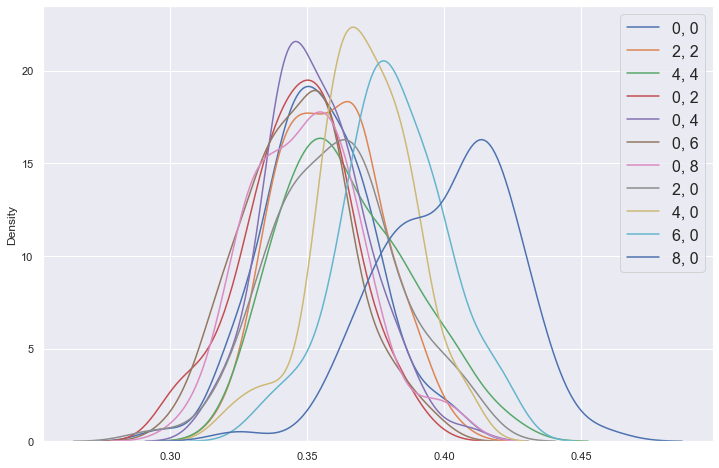

In [167]:
#kdensity of ATQ_0 systematic comparison


plt.rcParams['figure.figsize']=(12, 8)
sns.set(font_scale = 1)
bw_parameter = 1
sns.kdeplot(school_scores[:, 0, 0], label="0, 0", bw_adjust = bw_parameter)
sns.kdeplot(school_scores[:, 1, 0], label="2, 2", bw_adjust = bw_parameter)
sns.kdeplot(school_scores[:, 2, 0], label="4, 4", bw_adjust = bw_parameter)

sns.kdeplot(school_scores[:, 5, 0], label="0, 2", bw_adjust = bw_parameter)
sns.kdeplot(school_scores[:, 6, 0], label="0, 4", bw_adjust = bw_parameter)
sns.kdeplot(school_scores[:, 7, 0], label="0, 6", bw_adjust = bw_parameter)
sns.kdeplot(school_scores[:, 8, 0], label="0, 8", bw_adjust = bw_parameter)
sns.kdeplot(school_scores[:, 9, 0], label="2, 0", bw_adjust = bw_parameter)
sns.kdeplot(school_scores[:, 10, 0], label="4, 0", bw_adjust = bw_parameter)
sns.kdeplot(school_scores[:, 11, 0], label="6, 0", bw_adjust = bw_parameter)
sns.kdeplot(school_scores[:, 12, 0], label="8, 0", bw_adjust = bw_parameter)


plt.legend(loc=1, prop={'size': 16})

## Estimation Simulations

In [1]:
def discrete_matching_esti(I, B1, B2, δ_vec, β, K_0, K_1, K_2):
    
    #z1_init, z2_init = np.random.uniform(0, 1, size=I), np.random.uniform(0, 1, size=I)
    z1_init, z2_init = np.random.choice(np.linspace(0, 1, 11), size=I), np.random.choice(np.linspace(0, 1, 11), size=I)
    
    #eq_cutoff = return_cutoff(δ_vec[0], δ_vec[1], δ_vec[2], B1, B2, K_0, K_1, K_2, β)
    
    eq_cutoff_raw = return_cutoff(δ_vec[0], δ_vec[1], δ_vec[2], B1, B2, K_0, K_1, K_2, β)
    eq_cutoff = np.round(eq_cutoff_raw.astype(float), 1)
    
    
    P_1, P_2, P_1_prim, P_2_prim = eq_cutoff[0], eq_cutoff[1], eq_cutoff[2], eq_cutoff[3]
    
    teacher_matching = np.empty((I, 6))
    teacher_matching[:, 0:2]=np.concatenate((two_d(z1_init), two_d(z2_init)), axis=1)
    teacher_matching[:, 2:4]=np.concatenate((two_d(z1_init), two_d(z2_init)), axis=1)

    teacher_matching[:, 4] = np.zeros(I)
    teacher_matching[:, 5] = np.zeros(I)    
    
    #demand at t1
    for i in range(I):
        z_i1 = teacher_matching[i, 0]
        z_i2 = teacher_matching[i, 1]

        i_choice_set_t1 = [0]
        if z_i1 >= P_1:
            i_choice_set_t1.append(1)
        if z_i2 >= P_2:
            i_choice_set_t1.append(2)


        utility_vector = -1000*np.ones(3)

        for j in i_choice_set_t1:
            i_choice_set_t2_if_j_t1 = list(set([0, j]))
            if j==0:
                z_i1_prim = z_i1+B1
                z_i2_prim = z_i2+B2
            else:
                z_i1_prim = z_i1
                z_i2_prim = z_i2

            if z_i1_prim >= P_1_prim:
                i_choice_set_t2_if_j_t1.append(1)
            if z_i2_prim >= P_2_prim:
                i_choice_set_t2_if_j_t1.append(2)

            i_choice_t2 = np.array(list(set(i_choice_set_t2_if_j_t1)))
            utility_vector[j] = δ_vec[j]+β*(γ + np.log(np.sum(np.exp(i_choice_t2)))) + np.random.gumbel()

        teacher_matching[i, -2] = np.argmax(utility_vector.reshape(-1))

     
    #demand at t=2:
    for i in range(I):
        if teacher_matching[i, -2]==0.0:
            z_i1prim = teacher_matching[i, 0]+B1
            z_i2prim = teacher_matching[i, 1]+B2
        elif teacher_matching[i, -2]==1.0:
            z_i1prim = teacher_matching[i, 0]+1.5
            z_i2prim = teacher_matching[i, 1]
        elif teacher_matching[i, -2]==2.0:
            z_i1prim = teacher_matching[i, 0]
            z_i2prim = teacher_matching[i, 1]+1.5
        
        teacher_matching[i, 2:4] = np.array([z_i1prim, z_i2prim])
        
        i_choice_set_t2 = [0]
        if z_i1prim >= P_1_prim:
            i_choice_set_t2.append(1)
        if z_i2prim >= P_2_prim:
            i_choice_set_t2.append(2)
        i_choice_set_2 = np.array(list(set(i_choice_set_t2)))   
        
        utility_vector_t2 = -1000*np.ones(3)
        
        for j in i_choice_set_2:
            utility_vector_t2[j] = δ_vec[j] + np.random.gumbel()
        teacher_matching[i, -1] = np.argmax(utility_vector_t2.reshape(-1))
        
    return eq_cutoff, teacher_matching

In [10]:
#Discretization of state space for CCP computation

prec2 = 31

state_space_z1_2 = np.repeat(np.linspace(0, 3, prec2), prec2).reshape(prec2**2, 1, order='C')
state_space_z2_2 = np.repeat(np.linspace(0, 3, prec2), prec2).reshape(prec2, prec2).reshape(prec2**2, 1, order='F')
state_space_2 = np.concatenate((state_space_z1_2, state_space_z2_2), axis=1)

prec1=11
state_space_z1_1 = np.repeat(np.linspace(0, 1, prec1), prec1).reshape(prec1**2, 1, order='C')
state_space_z2_1 = np.repeat(np.linspace(0, 1, prec1), prec1).reshape(prec1, prec1).reshape(prec1**2, 1, order='F')
state_space_1 = np.concatenate((state_space_z1_1, state_space_z2_1), axis=1)


In [11]:
bonus_system = np.array([[1.5, 0.2, 0.2],
                         [0.0, 1.5, 0.0],
                         [0.0, 0.0, 1.5]])
#(i, j) entry of this matrix is the number of points school i grants for school j. Diagonals are 1.5 to account for DA*.
# Careful: this simplification of the state space is only possible for the 2-period model

β=0.9

In [12]:
def return_ccp(θ_hat, school_data, empirical_cutoff):
    
    δ_vec_hat = school_data.T@θ_hat.T
    
    #t = 2
    V_bar_T_vec = np.empty(state_space_2.shape[0])
    P_j_2_z = np.empty((state_space_2.shape[0], 3))

    for state_i, state in enumerate(state_space_2):
        z_T = state
        z_1 = z_T[0]
        z_2 = z_T[1]


        value_choice_set_z = [δ_vec_hat[0]]
        school_choice_set_z = [0]

        if z_1 >= empirical_cutoff[2]:
            value_choice_set_z.append(δ_vec_hat[1])
            school_choice_set_z.append(1)
        if z_2 >= empirical_cutoff[3]:
            value_choice_set_z.append(δ_vec_hat[2])
            school_choice_set_z.append(2)

        V_bar_T_vec[state_i] = γ + np.log(np.sum(np.exp(value_choice_set_z)))
        for j in range(3):
            if j in school_choice_set_z:
                P_j_2_z[state_i, j] = (np.exp(δ_vec_hat[j]))/(np.sum(np.exp(value_choice_set_z)))
            else:
                P_j_2_z[state_i, j] = 0
          

    #t=1 
    P_j_1_z = np.empty((state_space_1.shape[0], 3))

    for state_i, state in enumerate(state_space_1):
        z_t = state
        z_1 = z_t[0]
        z_2 = z_t[1]

        V_bar_if_choice_0 = V_bar_T_vec[(np.argwhere((np.round(state_space_2[:, 0], 1).tolist()==np.round(z_1 + bonus_system[0, 1], 1)) & (np.round(state_space_2[:, 1], 1).tolist()==np.round(z_2 + bonus_system[0, 2], 1)))[0][0])]
        V_bar_if_choice_1 = V_bar_T_vec[(np.argwhere((np.round(state_space_2[:, 0], 1).tolist()==np.round(z_1 + bonus_system[1, 1], 1)) & (np.round(state_space_2[:, 1], 1).tolist()==np.round(z_2 + bonus_system[1, 2], 1)))[0][0])]
        V_bar_if_choice_2 = V_bar_T_vec[(np.argwhere((np.round(state_space_2[:, 0], 1).tolist()==np.round(z_1 + bonus_system[2, 1], 1)) & (np.round(state_space_2[:, 1], 1).tolist()==np.round(z_2 + bonus_system[2, 2], 1)))[0][0])]

        V_bar_j = np.array([V_bar_if_choice_0, V_bar_if_choice_1, V_bar_if_choice_2])

        value_choice_set_z_2 = [δ_vec_hat[0] + β*V_bar_j[0]]    
        school_choice_set_z_2 = [0]

        if z_1 >= empirical_cutoff[0]:
            value_choice_set_z_2.append(δ_vec_hat[1]+β*V_bar_j[1])
            school_choice_set_z_2.append(1)
        if z_2 >= empirical_cutoff[1]:
            value_choice_set_z_2.append(δ_vec_hat[2]+β*V_bar_j[2])
            school_choice_set_z_2.append(2)

        for j in range(3):
            if j in school_choice_set_z_2:
                P_j_1_z[state_i, j] = (np.exp(δ_vec_hat[j] + β*V_bar_j[j]))/(np.sum(np.exp(value_choice_set_z_2)))
            else:
                P_j_1_z[state_i, j] = 0
                
    return P_j_1_z, P_j_2_z, V_bar_T_vec

In [13]:
def likelihood(θ_hat, matching, school_data):
    
    empirical_cutoffs = [np.min(matching[matching[:, -2]==1][:, 0]), np.min(matching[matching[:, -2]==2][:, 1]), np.min(matching[matching[:, -1]==1][:, 2]), np.min(matching[matching[:, -1]==2][:, 3])]
    empirical_cutoff = np.round(np.array(empirical_cutoffs), 3)
    
    P_j_1_z, P_j_2_z, V_bar = return_ccp(θ_hat, school_data, empirical_cutoff)

    P1_df = pd.DataFrame(P_j_1_z)
    P2_df = pd.DataFrame(P_j_2_z)
    match_df = pd.DataFrame(matching)

    state_1_list = []
    for state in range(prec1**2):
        state_1_list.append(tuple(np.round(state_space_1[state,:], 2)))

    state_2_list = []
    for state in range(prec2**2):
        state_2_list.append(tuple(np.round(state_space_2[state, :], 2)))


    P1_df.index = (state_1_list)
    P2_df.index = (state_2_list)

    logL = 0

    for i in range(I):
        x_t1 = np.round(match_df.iloc[i, 0:2], 2)
        z1_t1 = x_t1[0]
        z2_t1 = x_t1[1]
        logL += np.log(P_j_1_z[int(z1_t1*10*prec1 + z2_t1*10), int(match_df.iloc[i, 4])])
        
        x_t2 = np.round(match_df.iloc[i, 0:4], 2)
        z1_t2 = x_t2[2]
        z2_t2 = x_t2[3]
        logL += np.log(P_j_2_z[int(z1_t2*10*prec2 + z2_t2*10), int(match_df.iloc[i, 5])])
        
    
    return -logL

In [51]:
school_data=np.array([[-0.5, 0.7],
                      [0.6, 1.5],
                      [1.2, 0.3]]).T
l_exp = 20
I = 300
np.random.seed(5)



#(0.5, -0.3), (0.7, -0.8), (1.2, -0.5)

In [52]:
true_params = np.array([[0.5, -0.3]])
δ_v_1 = (school_data.T@true_params.T).reshape(-1)

In [53]:
theta_hat_hist_1_1 = np.empty((l_exp, 2))
starting_point_1_1 = np.zeros(2)

for i in range(l_exp):
    simu = discrete_matching_esti(I, 0.2, 0.2, δ_v_1, 0.9, K_0=1/3, K_1=1/3, K_2=1/3)
    matching = simu[1]
    theta_hat = minimize(likelihood, x0 = starting_point_1_1, args=(matching, school_data)).x
    theta_hat_hist_1_1[i, :] = theta_hat
    print(i+1, theta_hat)
    
theta_star_1_1 = np.mean(theta_hat_hist_1_1, axis=0)
theta_star_1_1_std = np.std(theta_hat_hist_1_1, axis=0)

1 [ 0.41262779 -0.31394511]
2 [ 0.42726469 -0.27383944]
3 [ 0.48080809 -0.26916478]
4 [ 0.36718302 -0.41595907]
5 [ 0.45028842 -0.41451758]
6 [ 0.52347236 -0.18089901]
7 [ 0.59692885 -0.37666865]
8 [ 0.6086976  -0.28657934]
9 [ 0.52357519 -0.22326595]
10 [ 0.52517719 -0.40448373]
11 [ 0.47451991 -0.30242448]
12 [ 0.46626769 -0.33093424]
13 [ 0.38965262 -0.43011631]
14 [ 0.47615819 -0.20621316]
15 [ 0.48092416 -0.30139595]
16 [ 0.47160846 -0.58623054]
17 [ 0.52115745 -0.47530714]
18 [ 0.51213274 -0.28369671]
19 [ 0.44750772 -0.51954625]
20 [ 0.40417345 -0.28919808]


In [54]:
theta_hat_hist_1_2 = np.empty((l_exp, 2))
starting_point_1_2 = np.random.uniform(-10, 10, size=2)

for i in range(l_exp):
    simu = discrete_matching_esti(I, 0.2, 0.2, δ_v_1, 0.9, K_0=1/3, K_1=1/3, K_2=1/3)
    matching = simu[1]
    theta_hat = minimize(likelihood, x0 = starting_point_1_2, args=(matching, school_data)).x
    theta_hat_hist_1_2[i, :] = theta_hat
    print(i+1, theta_hat)
    
theta_star_1_2 = np.mean(theta_hat_hist_1_2, axis=0)
theta_star_1_2_std = np.std(theta_hat_hist_1_2, axis=0)

1 [ 0.58900832 -0.23475359]
2 [ 0.46854194 -0.40716456]
3 [ 0.47273299 -0.35335183]
4 [ 0.55741057 -0.3401755 ]
5 [ 0.48736728 -0.43542096]
6 [ 0.32918317 -0.39465824]
7 [ 0.58692812 -0.31122403]
8 [ 0.49652916 -0.36317804]
9 [ 0.43714386 -0.38507383]
10 [ 0.3568604  -0.27389655]
11 [ 0.59384068 -0.3006326 ]
12 [ 0.54834871 -0.36890017]
13 [ 0.51770397 -0.11553034]
14 [ 0.51160674 -0.39684902]
15 [ 0.57136246 -0.22069281]
16 [ 0.52374817 -0.44330862]
17 [ 0.4731699  -0.19380321]
18 [ 0.46267733 -0.33128418]
19 [ 0.55722421 -0.23975469]
20 [ 0.55009053 -0.3590371 ]


In [55]:
theta_hat_hist_1_3 = np.empty((l_exp, 2))
starting_point_1_3 = true_params + np.random.normal(0, 1, size=2)

for i in range(l_exp):
    simu = discrete_matching_esti(I, 0.2, 0.2, δ_v_1, 0.9, K_0=1/3, K_1=1/3, K_2=1/3)
    matching = simu[1]
    theta_hat = minimize(likelihood, x0 = starting_point_1_3, args=(matching, school_data)).x
    theta_hat_hist_1_3[i, :] = theta_hat
    print(i+1, theta_hat)
    
theta_star_1_3 = np.mean(theta_hat_hist_1_3, axis=0)
theta_star_1_3_std = np.std(theta_hat_hist_1_3, axis=0)

1 [ 0.48484281 -0.23393688]
2 [ 0.55493918 -0.45113952]
3 [ 0.43569384 -0.35609302]
4 [ 0.48169989 -0.28042512]
5 [ 0.55372997 -0.4183646 ]
6 [ 0.49658387 -0.21217063]
7 [ 0.39430752 -0.27172733]
8 [ 0.43318996 -0.32039161]
9 [ 0.54857415 -0.46015119]
10 [ 0.70224521 -0.30684454]
11 [ 0.47164928 -0.20636955]
12 [ 0.44207844 -0.33681082]
13 [ 0.60073139 -0.35336164]
14 [ 0.58722938 -0.14993862]
15 [ 0.53551872 -0.37478883]
16 [ 0.62849085 -0.21023127]
17 [ 0.56033884 -0.29966726]
18 [ 0.51996706 -0.29616831]
19 [ 0.46152058 -0.35731031]
20 [ 0.48816001 -0.29180478]


In [58]:
true_params_2 = np.array([[0.7, -0.8]])
δ_v_2 = (school_data.T@true_params_2.T).reshape(-1)

In [59]:
theta_hat_hist_2_1 = np.empty((l_exp, 2))
starting_point_2_1 = np.zeros(2)

for i in range(l_exp):
    simu = discrete_matching_esti(I, 0.2, 0.2, δ_v_2, 0.9, K_0=1/3, K_1=1/3, K_2=1/3)
    matching = simu[1]
    theta_hat = minimize(likelihood, x0 = starting_point_2_1, args=(matching, school_data)).x
    theta_hat_hist_2_1[i, :] = theta_hat
    print(i+1, theta_hat)
    
theta_star_2_1 = np.mean(theta_hat_hist_2_1, axis=0)
theta_star_2_1_std = np.std(theta_hat_hist_2_1, axis=0)

1 [ 0.70835582 -0.86805118]
2 [ 0.6723527  -0.91368505]
3 [ 0.57402273 -0.87981749]
4 [ 0.65400734 -0.79967088]
5 [ 0.66799022 -0.93143086]
6 [ 0.60176187 -0.86748979]
7 [ 0.75548775 -0.77915848]
8 [ 0.65981961 -0.77010638]
9 [ 0.80696601 -0.89902762]
10 [ 0.68665555 -0.76645922]
11 [ 0.62557542 -0.6951332 ]
12 [ 0.6385902  -0.77298858]
13 [ 0.83491116 -0.8612417 ]
14 [ 0.69934938 -0.70376895]
15 [ 0.73988799 -0.81090973]
16 [ 0.63085574 -0.68283129]
17 [ 0.67443779 -0.82534799]
18 [ 0.77120891 -0.84964514]
19 [ 0.66804724 -0.68673244]
20 [ 0.70438761 -0.81870225]


In [61]:
theta_hat_hist_2_2 = np.empty((l_exp, 2))
starting_point_2_2 = np.random.uniform(-10, 10, size=2)

for i in range(l_exp):
    simu = discrete_matching_esti(I, 0.2, 0.2, δ_v_2, 0.9, K_0=1/3, K_1=1/3, K_2=1/3)
    matching = simu[1]
    theta_hat = minimize(likelihood, x0 = starting_point_2_2, args=(matching, school_data)).x
    theta_hat_hist_2_2[i, :] = theta_hat
    print(i+1, theta_hat)
    
theta_star_2_2 = np.mean(theta_hat_hist_2_2, axis=0)
theta_star_2_2_std = np.std(theta_hat_hist_2_2, axis=0)

1 [ 0.70392585 -0.86729698]
2 [ 0.70109017 -0.75665207]
3 [ 0.62231437 -0.75166478]
4 [ 0.60244855 -0.69871366]
5 [ 0.71372374 -0.73203229]
6 [ 0.68649419 -0.65625026]
7 [ 0.7023725  -1.05248783]
8 [ 0.66571976 -0.96461606]
9 [ 0.61699713 -0.75216188]
10 [ 0.63602851 -0.80249895]
11 [ 0.69481731 -0.61132647]
12 [ 0.68696127 -0.71547486]
13 [ 0.68825473 -0.80092083]
14 [ 0.64129124 -0.71432429]
15 [ 0.67014557 -0.67756742]
16 [ 0.75112695 -0.70919046]
17 [ 0.7391236  -0.70409949]
18 [ 0.59127184 -0.70300217]
19 [ 0.76021651 -0.75776836]
20 [ 0.6064308  -0.72097542]


In [62]:
theta_hat_hist_2_3 = np.empty((l_exp, 2))
starting_point_2_3 = true_params_2 + np.random.normal(0, 1, size=2)

for i in range(l_exp):
    simu = discrete_matching_esti(I, 0.2, 0.2, δ_v_2, 0.9, K_0=1/3, K_1=1/3, K_2=1/3)
    matching = simu[1]
    theta_hat = minimize(likelihood, x0 = starting_point_2_3, args=(matching, school_data)).x
    theta_hat_hist_2_3[i, :] = theta_hat
    print(i+1, theta_hat)
    
theta_star_2_3 = np.mean(theta_hat_hist_2_3, axis=0)
theta_star_2_3_std = np.std(theta_hat_hist_2_3, axis=0)

1 [ 0.79207962 -0.70974205]
2 [ 0.61502434 -0.67279992]
3 [ 0.71853071 -0.92426914]
4 [ 0.69027509 -0.76191994]
5 [ 0.71587935 -0.73585178]
6 [ 0.57598798 -0.6389005 ]
7 [ 0.71338203 -0.82655324]
8 [ 0.84155568 -0.83142919]
9 [ 0.70955556 -0.65282412]
10 [ 0.7588391  -0.84359264]
11 [ 0.69880045 -0.86305856]
12 [ 0.64159731 -0.80665889]
13 [ 0.77658801 -0.85799163]
14 [ 0.56609645 -0.75233469]
15 [ 0.65083576 -0.7038667 ]
16 [ 0.60493754 -0.77628378]
17 [ 0.67033752 -0.85491797]
18 [ 0.75005611 -0.81726414]
19 [ 0.74853022 -0.76028204]
20 [ 0.78280379 -0.88944982]


In [63]:
true_params_3 = np.array([[1.2, -0.5]])
δ_v_3 = (school_data.T@true_params_3  .T).reshape(-1)

In [64]:
theta_hat_hist_3_1 = np.empty((l_exp, 2))
starting_point_3_1 = np.zeros(2)

for i in range(l_exp):
    simu = discrete_matching_esti(I, 0.2, 0.2, δ_v_3, 0.9, K_0=1/3, K_1=1/3, K_2=1/3)
    matching = simu[1]
    theta_hat = minimize(likelihood, x0 = starting_point_3_1, args=(matching, school_data)).x
    theta_hat_hist_3_1[i, :] = theta_hat
    print(i+1, theta_hat)
    
theta_star_3_1 = np.mean(theta_hat_hist_3_1, axis=0)
theta_star_3_1_std = np.std(theta_hat_hist_3_1, axis=0)

1 [ 1.16547345 -0.50250132]
2 [ 0.99664345 -0.37087403]
3 [ 1.27915072 -0.35815961]
4 [ 1.23231039 -0.51633753]
5 [ 1.24346664 -0.41941728]
6 [ 1.20227644 -0.53144214]
7 [ 1.28449326 -0.72702478]
8 [ 1.35591311 -0.53740728]
9 [ 1.07628101 -0.40400787]
10 [ 1.13260783 -0.4538566 ]
11 [ 1.21282675 -0.60425092]
12 [ 1.24369084 -0.43219243]
13 [ 1.13364743 -0.54453892]
14 [ 1.16011033 -0.35633195]
15 [ 1.22186953 -0.35075473]
16 [ 1.2344985  -0.43371799]
17 [ 1.17933927 -0.55642156]
18 [ 1.20673363 -0.44018098]
19 [ 1.28767454 -0.56376503]
20 [ 1.16446422 -0.5064085 ]


In [65]:
theta_hat_hist_3_2 = np.empty((l_exp, 2))
starting_point_3_2 = np.random.uniform(-10, 10, size=2)

for i in range(l_exp):
    simu = discrete_matching_esti(I, 0.2, 0.2, δ_v_3, 0.9, K_0=1/3, K_1=1/3, K_2=1/3)
    matching = simu[1]
    theta_hat = minimize(likelihood, x0 = starting_point_3_2, args=(matching, school_data)).x
    theta_hat_hist_3_2[i, :] = theta_hat
    print(i+1, theta_hat)
    
theta_star_3_2 = np.mean(theta_hat_hist_3_2, axis=0)
theta_star_3_2_std = np.std(theta_hat_hist_3_2, axis=0)

1 [ 1.17638328 -0.56340094]
2 [ 1.06667337 -0.44915967]
3 [ 1.39035635 -0.60797615]
4 [ 1.2260498 -0.3067936]
5 [ 1.13598318 -0.4419268 ]
6 [ 1.26049626 -0.64810729]
7 [ 1.17045218 -0.39038173]
8 [ 1.24780237 -0.56820397]
9 [ 1.39321053 -0.54741718]
10 [ 1.15389423 -0.463776  ]
11 [ 1.1448859  -0.47414348]
12 [ 1.26850732 -0.47435596]
13 [ 1.03364863 -0.38236468]
14 [ 1.26123207 -0.53633911]
15 [ 1.23680851 -0.44095557]
16 [ 1.35485837 -0.38270793]
17 [ 1.1304003  -0.58591801]
18 [ 1.12555044 -0.36199032]
19 [ 1.25826469 -0.48148586]
20 [ 1.1559859  -0.36207019]


In [66]:
theta_hat_hist_3_3 = np.empty((l_exp, 2))
starting_point_3_3 = true_params_3 + np.random.normal(0, 1, size=2)

for i in range(l_exp):
    simu = discrete_matching_esti(I, 0.2, 0.2, δ_v_3, 0.9, K_0=1/3, K_1=1/3, K_2=1/3)
    matching = simu[1]
    theta_hat = minimize(likelihood, x0 = starting_point_3_3, args=(matching, school_data)).x
    theta_hat_hist_3_3[i, :] = theta_hat
    print(i+1, theta_hat)
    
theta_star_3_3 = np.mean(theta_hat_hist_3_3, axis=0)
theta_star_3_3_std = np.std(theta_hat_hist_3_3, axis=0)

1 [ 1.04276736 -0.46943019]
2 [ 1.29323323 -0.69870583]
3 [ 1.08340214 -0.5430509 ]
4 [ 1.18295295 -0.48316253]
5 [ 1.20277435 -0.42633228]
6 [ 1.01149815 -0.19211205]
7 [ 1.25184504 -0.39979371]
8 [ 1.2904454  -0.59792121]
9 [ 1.13721597 -0.58526521]
10 [ 1.3442299  -0.60557588]
11 [ 1.37243382 -0.61610486]
12 [ 1.32373104 -0.44218026]
13 [ 1.2016097  -0.36887953]
14 [ 1.1567505  -0.57297824]
15 [ 1.19863361 -0.31823276]
16 [ 1.46769601 -0.52364899]
17 [ 1.23257218 -0.48919551]
18 [ 1.14711107 -0.5630645 ]
19 [ 1.25559526 -0.57581842]
20 [ 1.0980692  -0.30481461]


In [173]:
theta_star_1_1, theta_star_1_2, theta_star_1_3

(array([ 0.47800628, -0.34421928]),
 array([ 0.50457393, -0.32343449]),
 array([ 0.51907455, -0.30938479]))

In [174]:
theta_star_2_1, theta_star_2_2, theta_star_2_3

(array([ 0.68873355, -0.80910991]),
 array([ 0.67403773, -0.75745123]),
 array([ 0.70108463, -0.78399954]))

In [175]:
theta_star_3_1, theta_star_3_2, theta_star_3_3

(array([ 1.20067357, -0.48047957]),
 array([ 1.20957219, -0.47347372]),
 array([ 1.21472834, -0.48881337]))

In [176]:
theta_star_1_1_std, theta_star_1_2_std, theta_star_1_3_std

(array([0.06120287, 0.10350514]),
 array([0.07036491, 0.08453061]),
 array([0.0733428 , 0.08065854]))

In [177]:
theta_star_2_1_std, theta_star_2_2_std, theta_star_2_3_std

(array([0.06477562, 0.07457426]),
 array([0.04880624, 0.10029343]),
 array([0.0730667 , 0.07866815]))

In [178]:
theta_star_3_1_std, theta_star_3_2_std, theta_star_3_3_std

(array([0.07816452, 0.09403096]),
 array([0.0959154 , 0.09126345]),
 array([0.11181068, 0.12231126]))

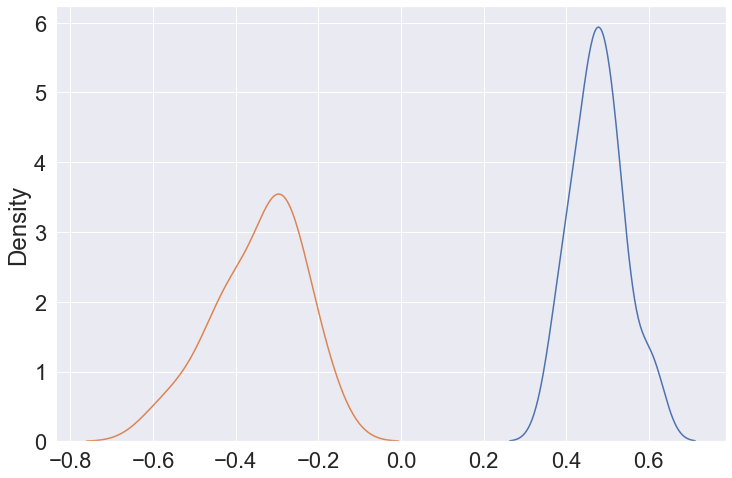

In [82]:
plt.rcParams['figure.figsize']=(12, 8)
sns.set(font_scale = 2)
bw_parameter = 1
sns.kdeplot(theta_hat_hist_1_1[:, 0], bw_adjust = bw_parameter)
sns.kdeplot(theta_hat_hist_1_1[:, 1], bw_adjust = bw_parameter)

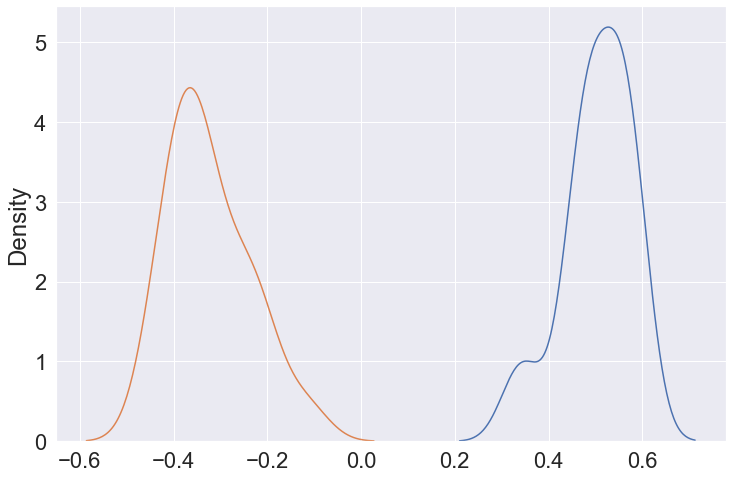

In [81]:
sns.kdeplot(theta_hat_hist_1_2[:, 0], bw_adjust = bw_parameter)
sns.kdeplot(theta_hat_hist_1_2[:, 1], bw_adjust = bw_parameter)

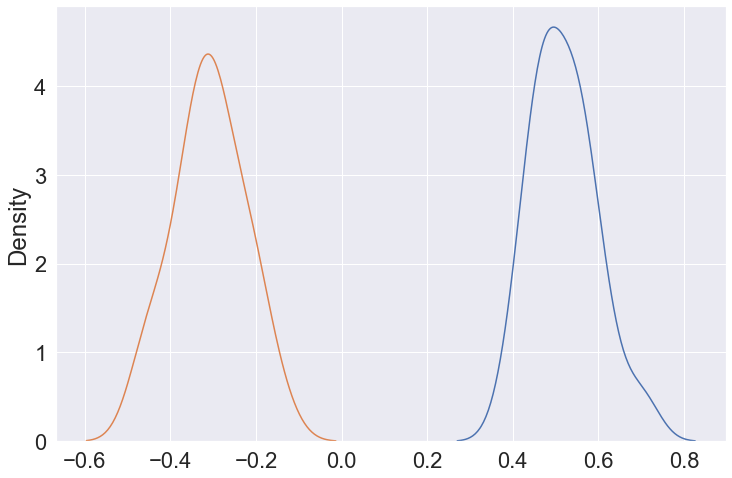

In [83]:
sns.kdeplot(theta_hat_hist_1_3[:, 0], bw_adjust = bw_parameter)
sns.kdeplot(theta_hat_hist_1_3[:, 1], bw_adjust = bw_parameter)

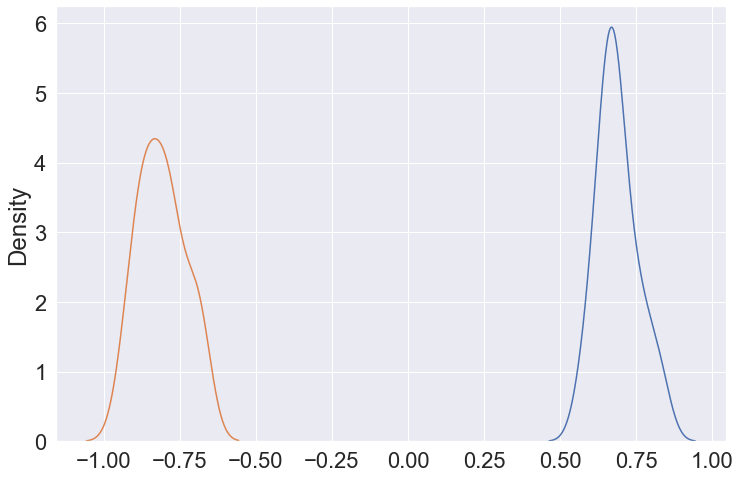

In [84]:
sns.kdeplot(theta_hat_hist_2_1[:, 0], bw_adjust = bw_parameter)
sns.kdeplot(theta_hat_hist_2_1[:, 1], bw_adjust = bw_parameter)

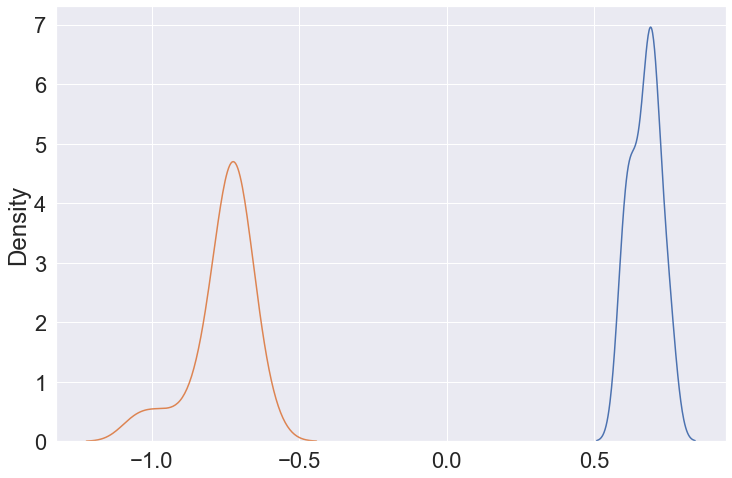

In [85]:
sns.kdeplot(theta_hat_hist_2_2[:, 0], bw_adjust = bw_parameter)
sns.kdeplot(theta_hat_hist_2_2[:, 1], bw_adjust = bw_parameter)

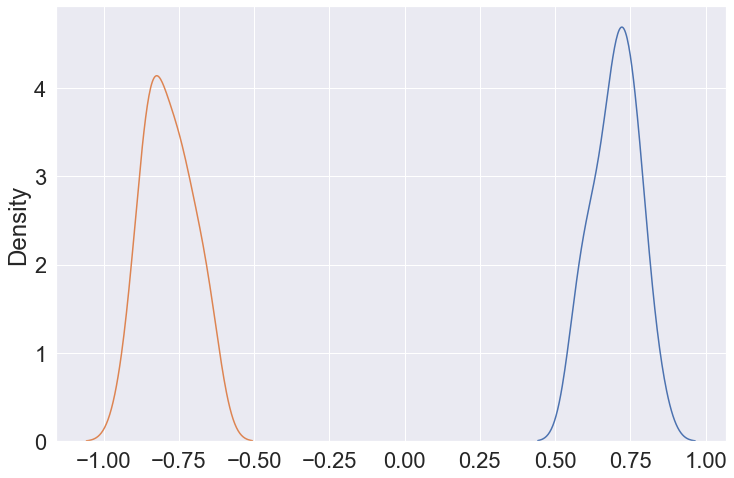

In [86]:
sns.kdeplot(theta_hat_hist_2_3[:, 0], bw_adjust = bw_parameter)
sns.kdeplot(theta_hat_hist_2_3[:, 1], bw_adjust = bw_parameter)

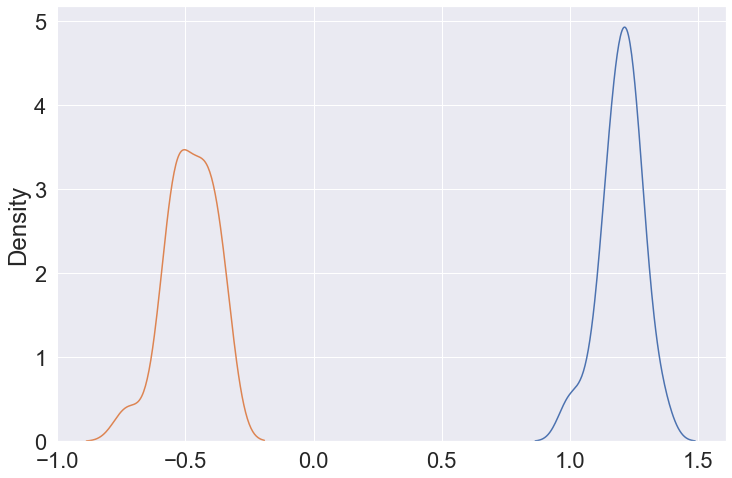

In [87]:
sns.kdeplot(theta_hat_hist_3_1[:, 0], bw_adjust = bw_parameter)
sns.kdeplot(theta_hat_hist_3_1[:, 1], bw_adjust = bw_parameter)

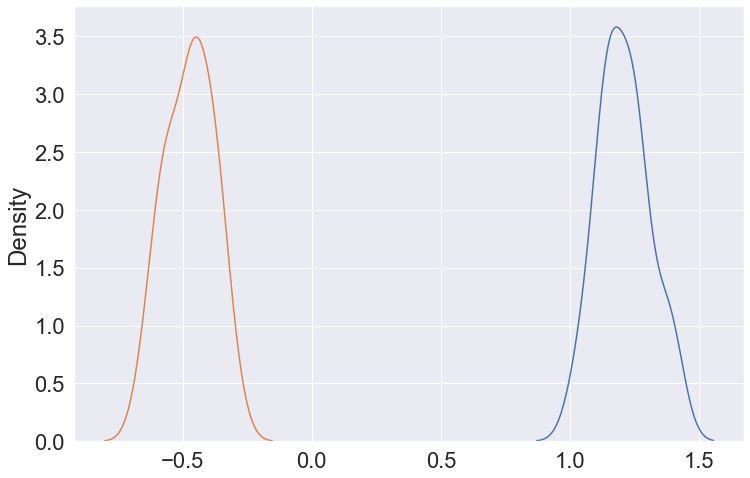

In [88]:
sns.kdeplot(theta_hat_hist_3_2[:, 0], bw_adjust = bw_parameter)
sns.kdeplot(theta_hat_hist_3_2[:, 1], bw_adjust = bw_parameter)

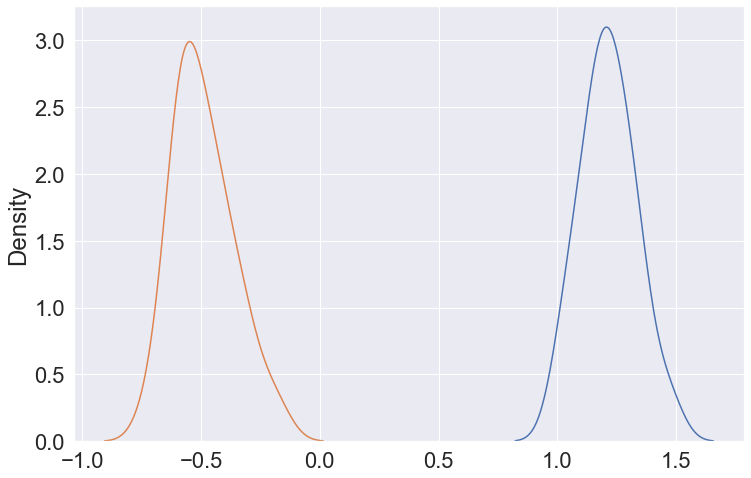

In [89]:
sns.kdeplot(theta_hat_hist_3_3[:, 0], bw_adjust = bw_parameter)
sns.kdeplot(theta_hat_hist_3_3[:, 1], bw_adjust = bw_parameter)

In [116]:
sim_1_val = np.concatenate((theta_star_1_1, theta_star_1_2, theta_star_1_3), axis=0)
sim_1_std = np.concatenate((theta_star_1_1_std, theta_star_1_2_std, theta_star_1_3_std), axis=0)
sim_1 = np.concatenate((two_d(sim_1_val), two_d(sim_1_std)), axis=1).T

sim_2_val = np.concatenate((theta_star_2_1, theta_star_2_2, theta_star_2_3), axis=0)
sim_2_std = np.concatenate((theta_star_2_1_std, theta_star_2_2_std, theta_star_2_3_std), axis=0)
sim_2 = np.concatenate((two_d(sim_2_val), two_d(sim_2_std)), axis=1).T

sim_3_val = np.concatenate((theta_star_3_1, theta_star_3_2, theta_star_3_3), axis=0)
sim_3_std = np.concatenate((theta_star_3_1_std, theta_star_3_2_std, theta_star_3_3_std), axis=0)
sim_3 = np.concatenate((two_d(sim_3_val), two_d(sim_3_std)), axis=1).T

In [117]:
sim_df = pd.DataFrame(np.concatenate((sim_1, sim_2, sim_3), axis=0))

In [119]:
path = "C:/.../"

sim_df.to_csv(path+"sim_estim.csv")